<a href="https://colab.research.google.com/github/VLNTNF/online-shoppers-dataset/blob/main/Online_Shoppers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Online Shoppers Intention**





In [1]:
csv_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# `DATA DESCRIPTION`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import scipy.stats as st

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
data_original = pd.read_csv(csv_file)
data_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data_original.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
data_original.isnull().sum()
# Le jeu de données ne présente aucune valeur manquante

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# `Etude des variables de type numériques`

Les attributs numériques sont les suivants:

- **Administrative**
- **Administrative_Duration**
- **Informational**
- **Informational_Duration**
- **ProductRelated**
- **ProductRelated_Duration**
- **BounceRates**
- **ExitRates**
- **PageValues**
- **SpecialDay**


In [7]:
# Liste des variables numériques
numerical_var = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
           'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

### Visualisation des variables numériques

In [8]:
# grouped bar chart

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
output_notebook()

color_list = ['steelblue', 'orange', 'red', 'green', 'brown', 'purple', 'yellowgreen', 'magenta', 'black', 'olive']
fig = []
for i in range(len(numerical_var)):
  if (i==0):
    fig.append(None)
    fig[i] = figure(plot_width=700, plot_height=350)
    fig[i].circle(data_original.index, data_original[numerical_var[i]], size=11, fill_color=color_list[i], fill_alpha=0.4, line_color=None, legend_label=numerical_var[i])
    fig[i].yaxis.axis_label = numerical_var[i]
  else:
    fig.append(None)
    fig[i] = figure(plot_width=700, plot_height=350)
    fig[i].circle(data_original.index, data_original[numerical_var[i]], size=11, fill_color=color_list[i], fill_alpha=0.4, line_color=None, legend_label=numerical_var[i])
    fig[i].x_range = fig[0].x_range
    fig[i].yaxis.axis_label = numerical_var[i]
    
grid = gridplot([[fig[0], fig[1]], 
                 [fig[2], fig[3]],
                 [fig[4], fig[5]],
                 [fig[6], fig[7]],
                 [fig[8], fig[9]]])
show(grid)

### Matrice de corrélation des variables numériques entre elles

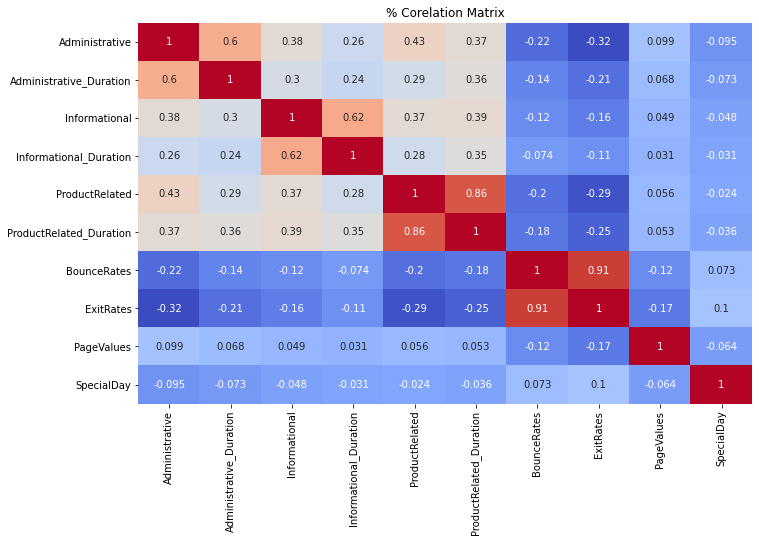

In [9]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False, annot=True, data=data_original[numerical_var].corr(), cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

Il apparaît que les couples **('ProductRelated', 'ProductRelated_Duration')**, **('BounceRates', 'ExitRates')** sont fortement correlés et que les couples **_('Administrative','Administrative_Duration')_**, **_('Informational','Informational_Duration')_** le sont que très légérement.

### Vérification de ces corrélations par des graphiques

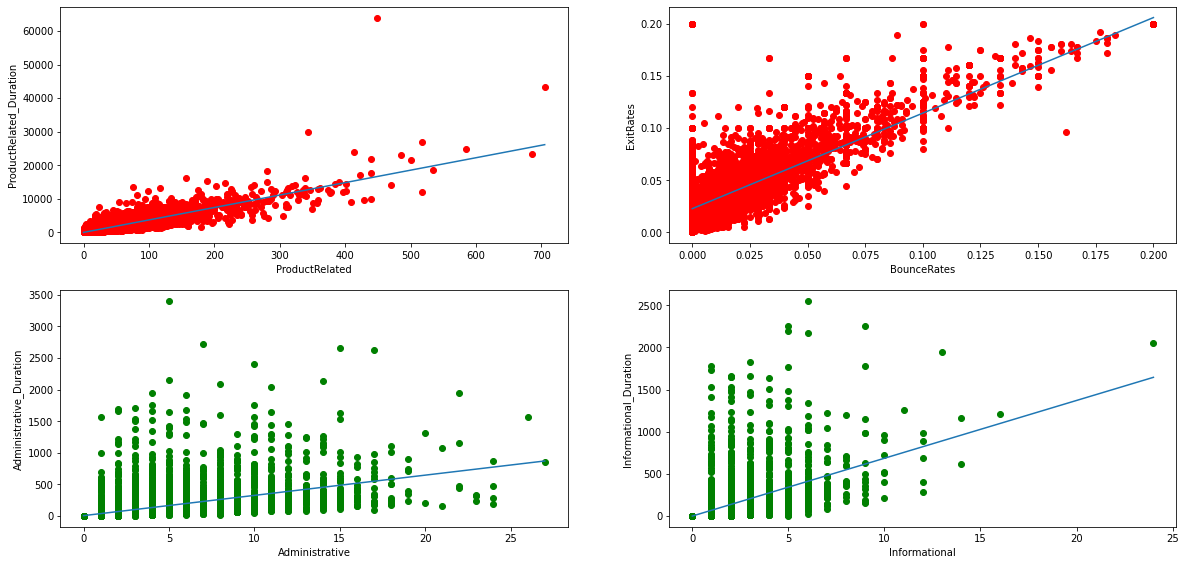

In [10]:
col_x = ['ProductRelated', 'BounceRates', 'Administrative', 'Informational']
col_y = ['ProductRelated_Duration', 'ExitRates', 'Administrative_Duration', 'Informational_Duration' ]
color = ['red', 'red', 'green', 'green']

plt.figure(figsize=(20, 20))

for i, col in enumerate(col_x):
    plt.subplot(4,2,i+1)
    x = data_original[col]
    y = data_original[col_y[i]]
    plt.plot(x,y,'o',color = color[i])
    # création de la ligne de regression
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
    plt.xlabel(col_x[i])
    plt.ylabel(col_y[i])

Les couples **('ProductRelated', 'ProductRelated_Duration')** et **('BounceRates', 'ExitRates')** sont effectivement très correlés, nous ne garderons qu'une variable de chaque couple, soit **'ProductRelated_Duration'** et **'BouceRates'**.

### Test de dépendance des variables numériques avec la variable cible catégorique avec l'ANOVA

In [11]:
import statsmodels.api

# Liste des couples (Variable_numerique ~ Variable_cible)
liste = ['Administrative ~ Revenue', 'Administrative_Duration ~ Revenue', 'Informational ~ Revenue', 'Informational_Duration ~ Revenue',
      'ProductRelated_Duration ~ Revenue', 'BounceRates ~ Revenue', 'PageValues ~ Revenue', 'SpecialDay ~ Revenue']

for couple in liste:
    resultat = statsmodels.formula.api.ols(couple, data=data_original).fit()
    table = statsmodels.api.stats.anova_lm(resultat)
    print(couple,'------------------->',': P-value = ',table.loc['Revenue','PR(>F)'],'\n')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Administrative ~ Revenue -------------------> : P-value =  3.519759837731935e-54 

Administrative_Duration ~ Revenue -------------------> : P-value =  2.1465136347090738e-25 

Informational ~ Revenue -------------------> : P-value =  3.1740343112085765e-26 

Informational_Duration ~ Revenue -------------------> : P-value =  5.2828708606337516e-15 

ProductRelated_Duration ~ Revenue -------------------> : P-value =  6.11533825336717e-65 

BounceRates ~ Revenue -------------------> : P-value =  1.5941975384886717e-63 

PageValues ~ Revenue -------------------> : P-value =  0.0 

SpecialDay ~ Revenue -------------------> : P-value =  5.498934260139406e-20 



Avec une p-value inférieure à 5% soit 0.05 nous concluons que le couple de variable est significatif par rapport à la variable cible 'Revenue'. Il apparaît donc que les variables **`Administrative`**, **`Administrative_Duration`**, **`Informational`**, **`Informational_Duration`**, **`ProductRelated_Duration`**, **`BounceRates`**, **`PageValues`** et **`SpecialDay`** influent toutes sur la variable cible.

### **Etendue (Répartition) des classes de la variable cible 'Revenue'** sur l'effectif total de la population

[]

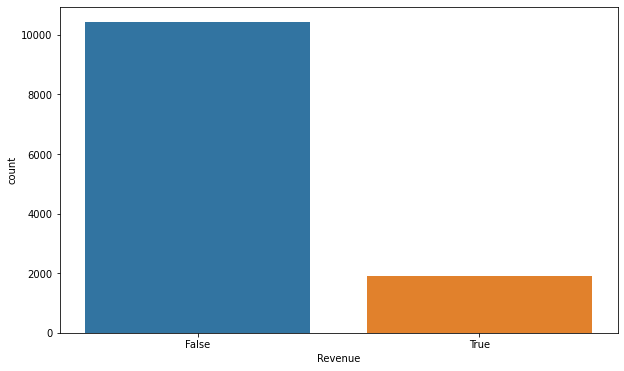

In [12]:
# Graphique de  l'effectif de chaque classe de la variable cible 'Revenue'
plt.figure(figsize=(10,6))
sns.countplot(data=data_original,x='Revenue')
plt.plot()

### Boxplot des variables numériques par rapport aux classes de la varible cible 'Revenue'

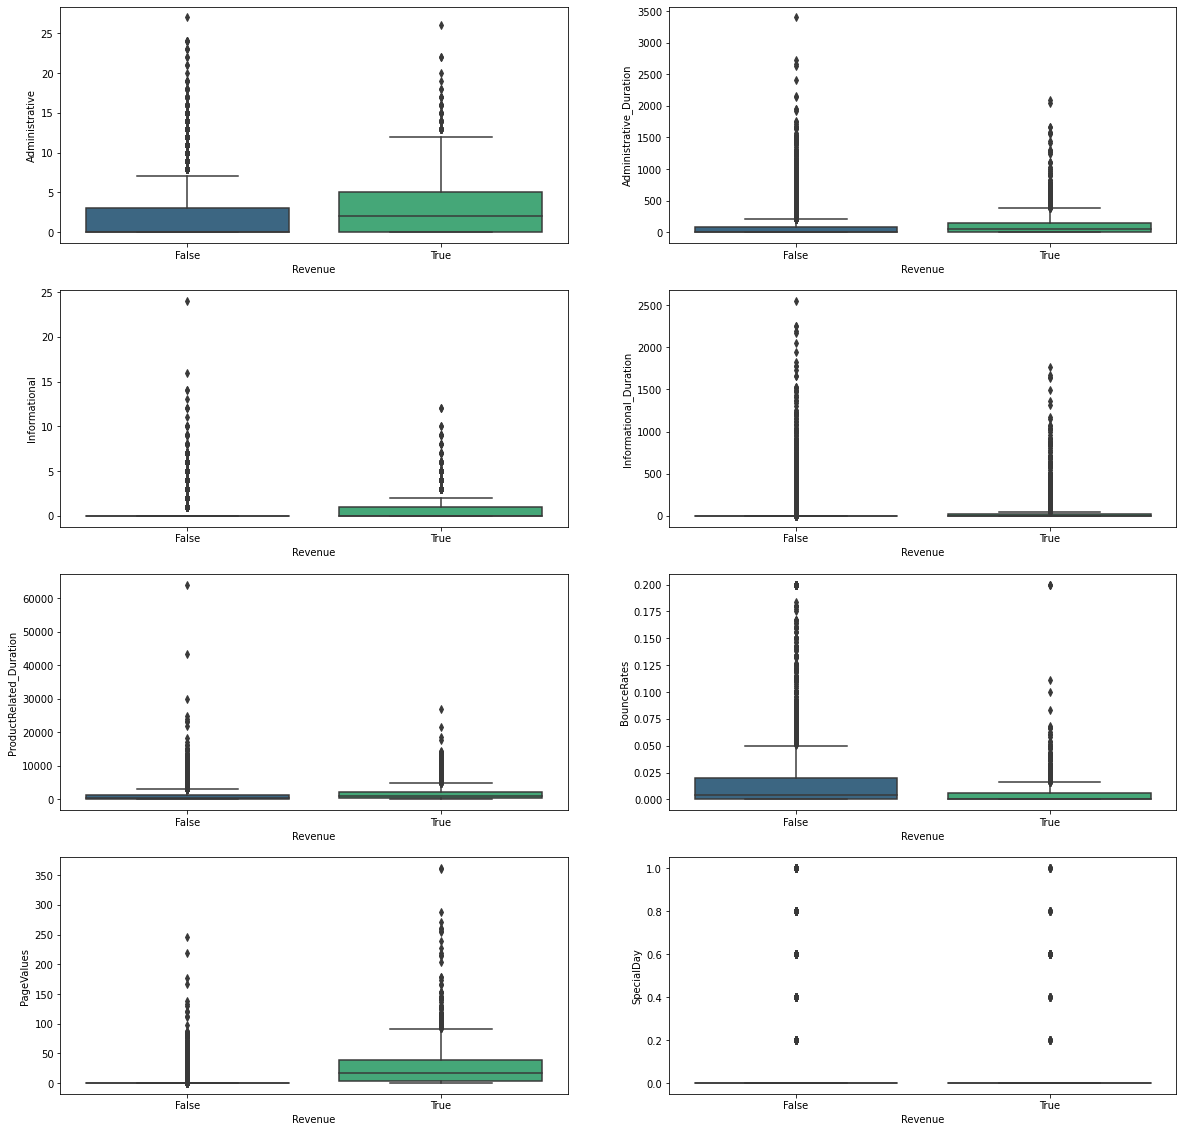

In [13]:
numerical_var = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
           'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(20,20))
for i, col in enumerate (numerical_var):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=data_original,x='Revenue',y=col,palette='viridis')
    plt.plot()

**Après observation du graphique de l'étendu des classes de la cible 'Revenue' _(vaste étendu pour la classe 'False' et petit étendu pour la classe 'True)_, ces Boxplots qui nous renseignent sur la répartition des valeurs des différentes variables numériques dans les 2 classes de 'Revenue' nous confirment effectivement, de façon visuelle, les résultats de notre test d'ANOVA que sont la dépendance de la variable cible 'Revenue' avec toutes ces variables numériques.** 

### Estimation de la densité de noyau de la variable cible 'Revenue' par rapport aux varaibles numériques

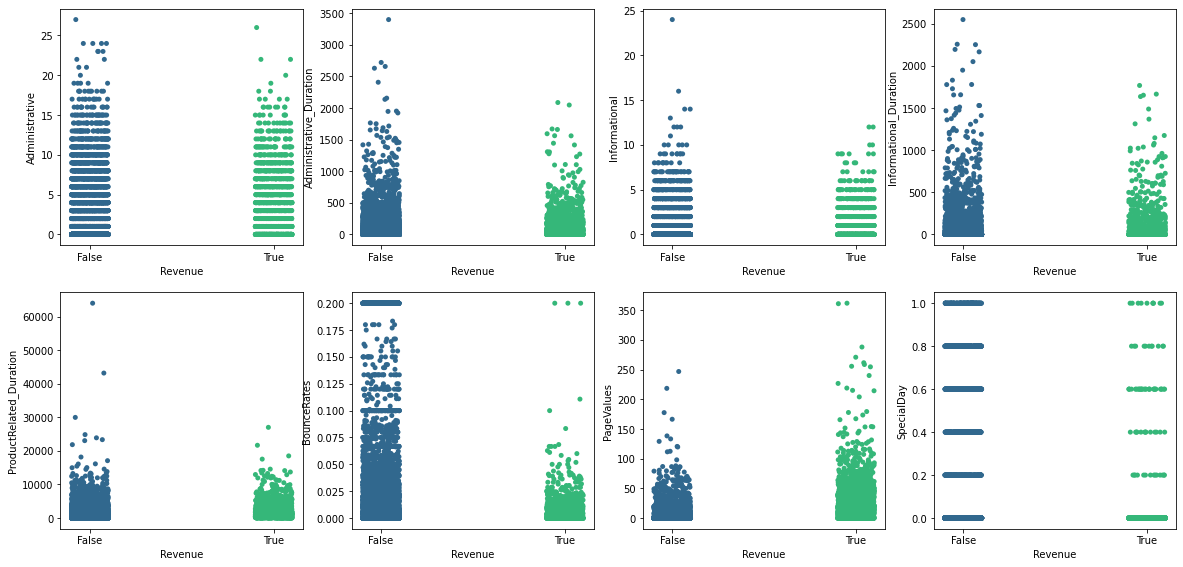

In [14]:
plt.figure(figsize=(20,20))
for i, col in enumerate (numerical_var):
    plt.subplot(4,4,i+1)
    sns.stripplot(data=data_original,x='Revenue',y=col,palette='viridis')
    #sns.kdeplot(data=data_original,x='Revenue',y=col,cmap='viridis',cbar=True)
    plt.plot()

**L'estimation de la densité du noyau est Une autre façon visuelle d'observer la répartition des valeurs des différentes variables numériques dans les classes de la variable 'Revenue'**

# `Etude des variables catégorielles`

Les attributs catégoriels sont les suivants:

- **Month**
- **OperatingSystems**
- **Browser**
- **Region**
- **TrafficType**
- **VisitorType**
- **Weekend**
- **Revenue**


### **Répartition des classes de chaque variable catégorielle en son sein** 

In [15]:
from math import pi

output_notebook()

from bokeh.io import output_notebook, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum

import warnings
warnings.filterwarnings('ignore')

p = []

######################## REVENUE ###########################
p.append(None)
x = {
    'False': data_original['Revenue'].value_counts().iloc[0],
    'True': data_original['Revenue'].value_counts().iloc[1]
}

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'Revenue'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = ['seagreen', 'skyblue']

p[0] = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@Revenue: @value", x_range=(-0.5, 1.0))

p[0].wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Revenue', source=data)

p[0].axis.axis_label=None
p[0].axis.visible=False
p[0].grid.grid_line_color = None
p[0].title.text = 'Revenue'
p[0].title.text_color = 'maroon'

######################## MONTH ###########################
p.append(None)
x = {
    'May': data_original['Month'].value_counts().iloc[0],
    'Nov': data_original['Month'].value_counts().iloc[1],
    'Mar': data_original['Month'].value_counts().iloc[2],
    'Dec': data_original['Month'].value_counts().iloc[3],
    'Oct': data_original['Month'].value_counts().iloc[4],
    'Sept': data_original['Month'].value_counts().iloc[5],
    'Aug': data_original['Month'].value_counts().iloc[6],
    'Jul': data_original['Month'].value_counts().iloc[7],
    'June': data_original['Month'].value_counts().iloc[8],
    'Feb': data_original['Month'].value_counts().iloc[9]
}
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'Month'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p[1] = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@Month: @value", x_range=(-0.5, 1.0))

p[1].wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Month', source=data)

p[1].axis.axis_label=None
p[1].axis.visible=False
p[1].grid.grid_line_color = None
p[1].title.text = 'Month'
p[1].title.text_color = 'maroon'

######################## OPERATING SYSTEMS ###########################
p.append(None)
x = {
    'Operating System 2': data_original['OperatingSystems'].value_counts().iloc[0],
    'Operating System 1': data_original['OperatingSystems'].value_counts().iloc[1],
    'Operating System 3': data_original['OperatingSystems'].value_counts().iloc[2],
    'Operating System 4': data_original['OperatingSystems'].value_counts().iloc[3],
    'Operating System 8': data_original['OperatingSystems'].value_counts().iloc[4],
    'Operating System 6': data_original['OperatingSystems'].value_counts().iloc[5],
    'Operating System 7': data_original['OperatingSystems'].value_counts().iloc[6],
    'Operating System 5': data_original['OperatingSystems'].value_counts().iloc[7]
}
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'OperatingSystems'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p[2] = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@OperatingSystems: @value", x_range=(-0.5, 1.0))

p[2].wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='OperatingSystems', source=data)

p[2].axis.axis_label=None
p[2].axis.visible=False
p[2].grid.grid_line_color = None
p[2].title.text = 'OperatingSystems'
p[2].title.text_color = 'maroon'

######################## BROWSER ###########################
p.append(None)
x = {
    'Browser 2': data_original['Browser'].value_counts().iloc[0],
    'Browser 1': data_original['Browser'].value_counts().iloc[1],
    'Browser 4': data_original['Browser'].value_counts().iloc[2],
    'Browser 5': data_original['Browser'].value_counts().iloc[3],
    'Browser 6': data_original['Browser'].value_counts().iloc[4],
    'Browser 10': data_original['Browser'].value_counts().iloc[5],
    'Browser 8': data_original['Browser'].value_counts().iloc[6],
    'Browser 3': data_original['Browser'].value_counts().iloc[7],
    'Browser 13': data_original['Browser'].value_counts().iloc[8],
    'Browser 7': data_original['Browser'].value_counts().iloc[9],
    'Browser 12': data_original['Browser'].value_counts().iloc[10],
    'Browser 11': data_original['Browser'].value_counts().iloc[11],
    'Browser 9': data_original['Browser'].value_counts().iloc[12]
}
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'Browser'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p[3] = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@Browser: @value", x_range=(-0.5, 1.0))

p[3].wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Browser', source=data)

p[3].axis.axis_label=None
p[3].axis.visible=False
p[3].grid.grid_line_color = None
p[3].title.text = 'Browser'
p[3].title.text_color = 'maroon'

######################## REGION ###########################
p.append(None)
x = {
    'Region 1': data_original['Region'].value_counts().iloc[0],
    'Region 3': data_original['Region'].value_counts().iloc[1],
    'Region 4': data_original['Region'].value_counts().iloc[2],
    'Region 2': data_original['Region'].value_counts().iloc[3],
    'Region 6': data_original['Region'].value_counts().iloc[4],
    'Region 7': data_original['Region'].value_counts().iloc[5],
    'Region 9': data_original['Region'].value_counts().iloc[6],
    'Region 8': data_original['Region'].value_counts().iloc[7],
    'Region 5': data_original['Region'].value_counts().iloc[8]
}
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'Region'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p[4] = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@Region: @value", x_range=(-0.5, 1.0))

p[4].wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Region', source=data)

p[4].axis.axis_label=None
p[4].axis.visible=False
p[4].grid.grid_line_color = None
p[4].title.text = 'Region'
p[4].title.text_color = 'maroon'

######################## TrafficType ###########################
p.append(None)
x = {
    'TrafficType 2': data_original['TrafficType'].value_counts().iloc[0],
    'TrafficType 1': data_original['TrafficType'].value_counts().iloc[1],
    'TrafficType 3': data_original['TrafficType'].value_counts().iloc[2],
    'TrafficType 4': data_original['TrafficType'].value_counts().iloc[3],
    'TrafficType 13': data_original['TrafficType'].value_counts().iloc[4],
    'TrafficType 10': data_original['TrafficType'].value_counts().iloc[5],
    'TrafficType 6': data_original['TrafficType'].value_counts().iloc[6],
    'TrafficType 8': data_original['TrafficType'].value_counts().iloc[7],
    'TrafficType 5': data_original['TrafficType'].value_counts().iloc[8],
    'TrafficType 11': data_original['TrafficType'].value_counts().iloc[9],
    'TrafficType 20': data_original['TrafficType'].value_counts().iloc[10],
    'TrafficType 9': data_original['TrafficType'].value_counts().iloc[11],
    'TrafficType 7': data_original['TrafficType'].value_counts().iloc[12],
    'TrafficType 15': data_original['TrafficType'].value_counts().iloc[13],
    'TrafficType 19': data_original['TrafficType'].value_counts().iloc[14],
    'TrafficType 14': data_original['TrafficType'].value_counts().iloc[15],
    'TrafficType 18': data_original['TrafficType'].value_counts().iloc[16],
    'TrafficType 16': data_original['TrafficType'].value_counts().iloc[17],
    'TrafficType 12': data_original['TrafficType'].value_counts().iloc[18],
    'TrafficType 17': data_original['TrafficType'].value_counts().iloc[19]
}
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'TrafficType'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p[5] = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@TrafficType: @value", x_range=(-0.5, 1.0))

p[5].wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='TrafficType', source=data)

p[5].axis.axis_label=None
p[5].axis.visible=False
p[5].grid.grid_line_color = None
p[5].title.text = 'TrafficType'
p[5].title.text_color = 'maroon'

######################## VisitorType ###########################
p.append(None)
x = {
    'Returning_Visitor': data_original['VisitorType'].value_counts().iloc[0],
    'New_Visitor': data_original['VisitorType'].value_counts().iloc[1],
    'Other': data_original['VisitorType'].value_counts().iloc[2],
}
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'VisitorType'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p[6] = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@VisitorType: @value", x_range=(-0.5, 1.0))

p[6].wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='VisitorType', source=data)

p[6].axis.axis_label=None
p[6].axis.visible=False
p[6].grid.grid_line_color = None
p[6].title.text = 'VisitorType'
p[6].title.text_color = 'maroon'

######################## WEEKEND ###########################
p.append(None)
x = {
    'False': data_original['Weekend'].value_counts().iloc[0],
    'True': data_original['Weekend'].value_counts().iloc[1]
}

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'Weekend'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = ['darkorange', 'burlywood']

p[7] = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@Weekend: @value", x_range=(-0.5, 1.0))

p[7].wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Weekend', source=data)

p[7].axis.axis_label=None
p[7].axis.visible=False
p[7].grid.grid_line_color = None
p[7].title.text = 'Weekend'
p[7].title.text_color = 'maroon'

grid = gridplot([[p[1], p[2]], 
                 [p[3], p[4]],
                 [p[5], p[6]],
                 [p[7], p[0]]])


show(grid)

### Convertir les variables catégorielles en type 'category'

In [16]:
data_original['Month'] = data_original['Month'].astype('category')
data_original['OperatingSystems'] = data_original['OperatingSystems'].astype('category')
data_original['Browser'] = data_original['Browser'].astype('category')
data_original['Region'] = data_original['Region'].astype('category')
data_original['TrafficType'] = data_original['TrafficType'].astype('category')
data_original['VisitorType'] = data_original['VisitorType'].astype('category')
data_original['Weekend'] = data_original['Weekend'].astype('category')
data_original['Revenue'] = data_original['Revenue'].astype('category')

### Tests de dépendance Chi2 des variables catégorielles avec la variable cible 'Revenue'

In [17]:
variables = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
target = 'Revenue'

pvalue = {}
for var in variables:
    cont = data_original[[var, target]].pivot_table(index=var,columns=target,aggfunc=len)
    cont = cont.fillna(0)
    st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
    pvalue[var] = st_p

pvalue

{'Browser': 0.00608754317955109,
 'Month': 2.2387855164805443e-77,
 'OperatingSystems': 1.4160941129614401e-13,
 'Region': 0.3214249979076556,
 'TrafficType': 1.652735258160153e-67,
 'VisitorType': 4.269904152293867e-30,
 'Weekend': 0.0012663251061221968}

Avec une p-value inférieure à 5% soit 0.05 nous concluons que la variable catégorielle est significative par rapport à la variable cible 'Revenue'. **La variable _'Region'_ a une p-value > 0.05, donc on peut conclure qu'elle n'a pas d'influence sur la variable cible**. Il apparaît donc que les variables **`Month`**, **`OperatingSystems`**, **`Browser`**, **`TrafficType`**, **`VisitorType`**, **`Weekend`**, influent sur **_'Revenue'_** et nous ne garderons que celles-là.

### Variables catégorielles Vs Variable cible 'Revenue':

**Diagramme en barres séparées, en effectifs.**


In [18]:
# grouped bar chart

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.core.properties import value
from bokeh.transform import dodge
from bokeh.layouts import gridplot
output_notebook()

categorical_var = ['Month','OperatingSystems','Browser','TrafficType','VisitorType','Weekend']
grouped_bar = [] 

for i in range (len(categorical_var)):
    cont = data_original[[categorical_var[i], 'Revenue']].pivot_table(index=categorical_var[i],columns='Revenue',aggfunc=len)
    
    # data
    categories = cont.index.to_list()
    categories = [str(ind) for ind in categories]
    grouped_bar_df = pd.DataFrame({'categories' : categories,
                                   'False': cont[False].to_list(),
                                   'True': cont[True].to_list()})

    max1 = max(cont[False].to_list())
    max2 = max(cont[True].to_list())
    maximum = max((max1, max2))


    # plot
    grouped_bar.append(None)
    grouped_bar[i] = figure(x_range=categories, y_range=(0, maximum+250), plot_height=250)

    # offsets bars / bar locations on axis
    dodge1 = dodge('categories', -0.15, range=grouped_bar[i].x_range)
    dodge3 = dodge('categories',  0.10, range=grouped_bar[i].x_range)

    grouped_bar[i].vbar(x=dodge1, top='False', width=0.2, source=grouped_bar_df, color='olive', legend_label='False')
    grouped_bar[i].vbar(x=dodge3, top='True', width=0.2, source=grouped_bar_df, color='skyblue', legend_label='True')

    # format legend.legend.location = 'top_left'
    grouped_bar[i].legend.orientation = 'horizontal'

grid = gridplot([[grouped_bar[0], grouped_bar[1]], 
                 [grouped_bar[2], grouped_bar[3]],
                 [grouped_bar[4], grouped_bar[5]]], )

show(grid)

**Ces graphes montrent la répartition des classes de chaque variable catégorielle dans les 2 classes de la variables cible 'Revenue'.**

# `Data preprocessing`

### Features  selection

On peut retirer les variables qui ne serveront pas: ce sont **'ProductRelated'** et **'ExitRates'** pour les variables numériques et la variable **'Region'** pour les variables catégorielles. 

In [19]:
data_new = data_original.copy()

del(data_new['ProductRelated'])
del(data_new['ExitRates'])
del(data_new['Region'])

#data_new.info()

### Création de nouvelles variables à partir de variables existantes

Nous créons 2 nouvelles variables à partir des variables déjà existantes:
- **ratio_administrative**: C'est le ratio des variables Administrative_Duration et Administrative, correlées à 0.6. La nouvelle variable peut être interpretée comme le temps passé par page dans la catégorie Administrative.
- **ratio_informational**: C'est le ratio des variables Informational_Duration et Informational, correlées à 0.62. La nouvelle variable peut être interpretée comme le temps passé par page dans la catégorie Informational.

In [20]:
data_new['ratio_administrative'] = data_new['Administrative_Duration']/data_new['Administrative']
data_new['ratio_administrative'] = data_new['ratio_administrative'].fillna(0)

data_new['ratio_informational'] = data_new['Informational_Duration']/data_new['Informational']
data_new['ratio_informational'] = data_new['ratio_informational'].fillna(0)

# Suppression des varaibles qui nous ont servi à en créer de nouvelles
del(data_new['Administrative'])
del(data_new['Administrative_Duration'])
del(data_new['Informational'])
del(data_new['Informational_Duration'])

data_new.head()

,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue,ratio_administrative,ratio_informational
0,0.000000,0.20,0.0,0.0,Feb,1,1,1,Returning_Visitor,False,False,0.0,0.0
1,64.000000,0.00,0.0,0.0,Feb,2,2,2,Returning_Visitor,False,False,0.0,0.0
2,0.000000,0.20,0.0,0.0,Feb,4,1,3,Returning_Visitor,False,False,0.0,0.0
3,2.666667,0.05,0.0,0.0,Feb,3,2,4,Returning_Visitor,False,False,0.0,0.0
4,627.500000,0.02,0.0,0.0,Feb,3,3,4,Returning_Visitor,True,False,0.0,0.0


### Dummies variables à partir des variables catégorielles

In [21]:
# Variable 'Month'
dummies = pd.get_dummies(data_new['Month'],drop_first=True, prefix='Month', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['Month'])

# Variable 'OperatingSystems'
dummies = pd.get_dummies(data_new['OperatingSystems'],drop_first=True, prefix='OperatingSystems', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['OperatingSystems'])

# Variable 'Browser'
dummies = pd.get_dummies(data_new['Browser'],drop_first=True, prefix='browser', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['Browser'])

# Variable 'TrafficType'
dummies = pd.get_dummies(data_new['TrafficType'],drop_first=True, prefix='TrafficType', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['TrafficType'])

# Variable 'VisitorType'
dummies = pd.get_dummies(data_new['VisitorType'],drop_first=True, prefix='VisitorType', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['VisitorType'])

# Variable 'Weekend'
dummies = pd.get_dummies(data_new['Weekend'],drop_first=True, prefix='Weekend', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['Weekend'])

# Juste remettre la colonne de la variable target à la fin et le convertir en 1 et 0
temp = data_new['Revenue']
del(data_new['Revenue'])
data_new['Revenue'] = temp
data_new['Revenue'] = data_new['Revenue'].astype('int')

data_new.head()

,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,ratio_administrative,ratio_informational,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,browser_2,browser_3,browser_4,browser_5,browser_6,browser_7,browser_8,browser_9,browser_10,browser_11,browser_12,browser_13,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue
0,0.000000,0.20,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,64.000000,0.00,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.20,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2.666667,0.05,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,627.500000,0.02,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [22]:
features = data_new.iloc[:,0:56].columns.to_list()
target = 'Revenue'

### Partionnement des données en set de train et set de test

In [23]:
X = data_new.iloc[:,0:56].values
Y = data_new.iloc[:,56].values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify=Y)

### Normalisation des données

In [24]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

# `Modelisation`

## **(1) Modèle KNN**

Text(0, 0.5, 'score')

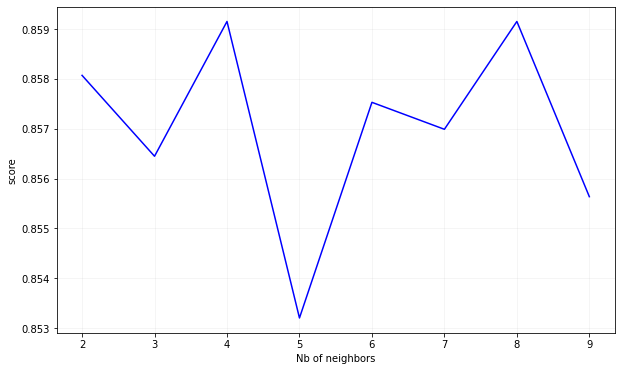

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Liste de différentes valeurs pour le parametre n_neighbors
n_neighbors_list = np.arange(2,10)
# Liste des scores obtenus pour chaque valeur de n_neighbors
score_list = []

plt.figure(figsize=(10, 6))

for n in n_neighbors_list:
    # Créer d'une instance du modèle
    knn_model = KNeighborsClassifier(n_neighbors=n)
    # Entrainement du modèle
    knn_model.fit(X_train, y_train)

    # Prédictions et score
    predictions = knn_model.predict(X_test)
    score_list.append(knn_model.score(X_test, y_test))

plt.plot(n_neighbors_list, score_list, color='blue')
plt.grid(alpha=0.15)
plt.xlabel('Nb of neighbors')
plt.ylabel('score')

In [26]:
print('Score max: ', max(score_list))
print('Nb of neighbors: ', n_neighbors_list[score_list.index(max(score_list))])

Score max:  0.8591511219248446
Nb of neighbors:  4


### Cross validation

Text(0, 0.5, 'score')

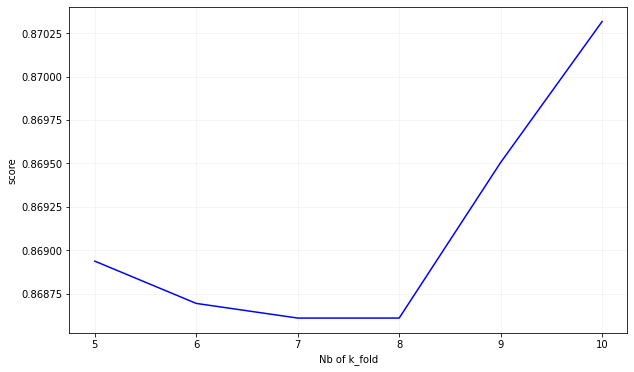

In [27]:
# Modèle KNN avec la meilleure valeur pour le paramètre n_neighbors
knn_model = KNeighborsClassifier(n_neighbors=4)

# Liste de différentes valeurs de k_fold
cv_grid = np.arange(5,11)
# Liste des scores obtenus pour chaque valeur du paramètre cv
score_list = []

plt.figure(figsize=(10, 6))

for val in cv_grid:
    score = cross_val_score(knn_model, X, Y, cv = val)
    score = np.mean(score) # Moyenne de tous les scores obtenus
    score_list.append(score)
    
plt.plot(cv_grid, score_list, color='blue')
plt.grid(alpha=0.15)
plt.xlabel('Nb of k_fold')
plt.ylabel('score')

In [28]:
print('Score max: ', max(score_list), '----> Nb de k-fold =', cv_grid[score_list.index(max(score_list))])
print('Mean of scores', np.mean(score_list))

Score max:  0.870316301703163 ----> Nb de k-fold = 10
Mean of scores 0.8691122203757641


##### **Avec un nombre de f-Fold entre 5 et 10 et en fixant le paramètre n_neighbors à 4, nous obtenons un score moyen de `0.8691` avec un algorithme de KNN**

### ---> Modèle KNN: 

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

## **(2) Modèle de regression logistique**

In [30]:
from sklearn.linear_model import LogisticRegression

# Créer d'une instance du modèle
logistic_model = LogisticRegression(solver='liblinear')

# Entrainement du modèle
logistic_model.fit(X_train, y_train)

# Prédictions
y_pred = logistic_model.predict(X_test)

In [31]:
# Evaluation du modèle

from sklearn.metrics import confusion_matrix

print('Score: ', logistic_model.score(X_train, y_train))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm, columns=['False', 'True'], index=['real_False','real_True'])
cm

Score:  0.8748696558915537


,False,True
real_False,3091,36
real_True,422,150


In [32]:
TP = cm.loc['real_True','True']
TN = cm.loc['real_False','False']
FP = cm.loc['real_False', 'True']
FN = cm.loc['real_True', 'False']

In [33]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('accuracy = ',accuracy)
precision = TP/(TP+FP)
print('Precision = ',precision)

accuracy =  0.8761827520951608
Precision =  0.8064516129032258


### Cross validation

Text(0, 0.5, 'score')

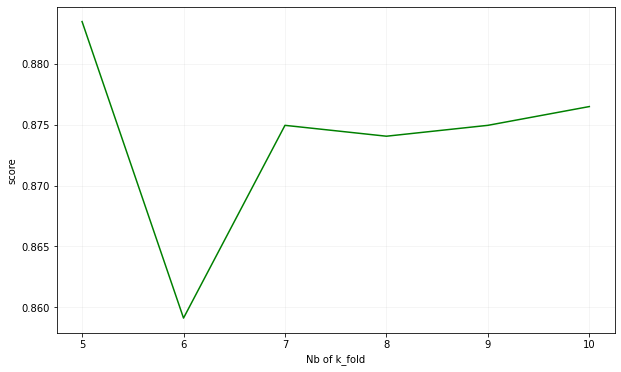

In [34]:
from sklearn.model_selection import cross_val_score

# Liste de différentes valeurs de k_fold
cv_grid = np.arange(5,11)
# Liste des scores obtenus pour chaque valeur du paramètre cv
score_list = []

plt.figure(figsize=(10, 6))

for val in cv_grid:
    score = cross_val_score(logistic_model, X, Y, cv = val)
    score = np.mean(score) # Moyenne de tous les scores obtenus
    score_list.append(score)
    
plt.plot(cv_grid, score_list, color='green')
plt.grid(alpha=0.15)
plt.xlabel('Nb of k_fold')
plt.ylabel('score')

In [35]:
print('Score max: ', max(score_list), '----> Nb de k-fold =', cv_grid[score_list.index(max(score_list))])
print('Mean of scores', np.mean(score_list))

Score max:  0.8834549878345499 ----> Nb de k-fold = 5
Mean of scores 0.8738306565445705


##### **Avec un nombre de f-Fold entre 5 et 10, nous obtenons un score moyen de `0.8758` avec un algorithme LogisticRegession**

### ---> Modèle LogisticRegression

In [36]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## **(3) Arbre de décision de classification**

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
# Initialisation d'un objet DecisionTreeClassifier avec deux arguments.
decTree_model = DecisionTreeClassifier(criterion='gini', random_state=50)

# Ajustement du modèle sur les données d’entraînement
decTree_model.fit(X_train, y_train)

# Evaluation de la précision sur les données de test.
decTree_model.score(X_test, y_test)

0.863206271965396

In [39]:
# Prédictions
y_pred = decTree_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm, columns=['False', 'True'], index=['real_False','real_True'])
cm

,False,True
real_False,2857,270
real_True,236,336


### Concept de Réglage des Hyperparamètres pour l'arbre de Décision.

- Profondeur maximale
- Min samples leaf

In [40]:
# Creation de grille des differents hyperparameters

grid_params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08]
}

In [41]:
# Création d'un GridSearchCVobjet avec le classifieur de l’arbre de décision comme estimateur

grid_object = GridSearchCV(estimator = decTree_model, param_grid = grid_params, scoring = 'accuracy', cv = 10)

In [42]:
# Ajustement de cet objet de grille aux données d'apprentissage
grid_object.fit(X, Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=50,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        

## Lecture graphique des scores en fonction de **'max_depth'** et de **'min_samples_leaf'**

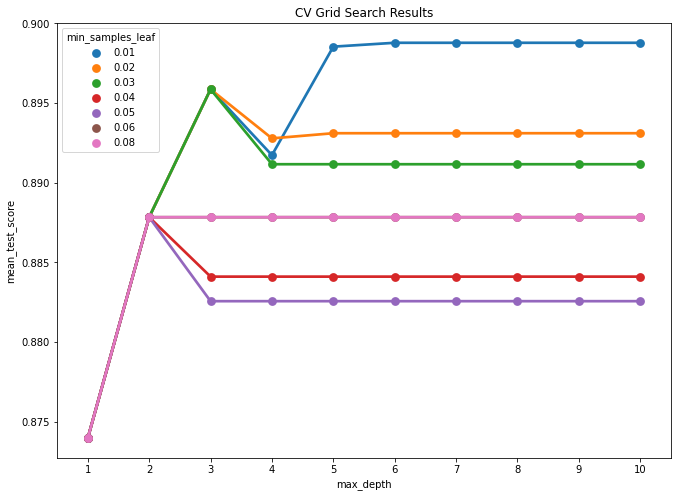

In [43]:
def plot_cv_results(cv_results_, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(grid_object.cv_results_)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_object, 'max_depth', 'min_samples_leaf')

In [44]:
#Extraction des meilleures parametres
grid_object.best_params_

{'max_depth': 6, 'min_samples_leaf': 0.01}

### Instancier de nouveau le modèle avec ces paramètres optimaux

In [45]:
decTree_model = DecisionTreeClassifier(criterion='gini', max_depth=grid_object.best_params_['max_depth'], 
                                       min_samples_leaf=grid_object.best_params_['min_samples_leaf'], random_state=50)

### Cross validation sur cette nouvelle instance de modèle

Text(0, 0.5, 'score')

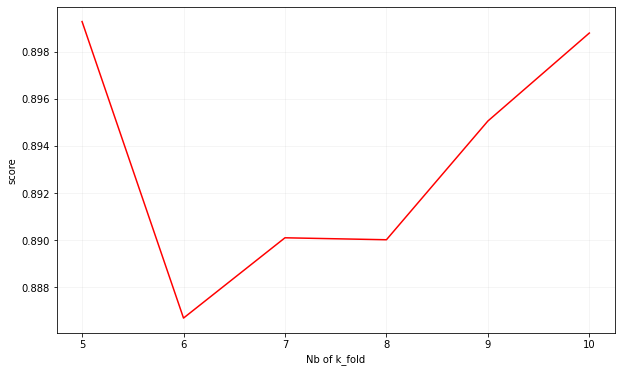

In [46]:
# Liste de différentes valeurs de k_fold
cv_grid = np.arange(5,11)

# Liste des scores obtenus pour chaque valeur du paramètre cv
score_list = []

plt.figure(figsize=(10, 6))

for val in cv_grid:
    score = cross_val_score(decTree_model, X, Y, cv = val)
    score = np.mean(score)
    score_list.append(score)
plt.plot(cv_grid, score_list, color='red')
plt.grid(alpha=0.15)
plt.xlabel('Nb of k_fold')
plt.ylabel('score')

In [47]:
print('Score max: ', max(score_list), '----> Nb de k-fold =', cv_grid[score_list.index(max(score_list))])
print('Mean of scores', np.mean(score_list))

Score max:  0.8992700729927007 ----> Nb de k-fold = 5
Mean of scores 0.8933212442230349


##### **Avec un nombre de f-Fold entre 5 et 10, et avec les paramètres _'max_depth': 6 et 'min_samples_leaf': 0.01_ nous obtenons un score moyen de `0.8933` avec un algorithme DecisionTreeClassifier**

### ---> Modèle DecisionTreeClassifier:

In [48]:
decTree_model = DecisionTreeClassifier(criterion='gini', max_depth=grid_object.best_params_['max_depth'], 
                                       min_samples_leaf=grid_object.best_params_['min_samples_leaf'], random_state=50)

decTree_model.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

## **(4) Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation d'un classifieur de forêt aléatoire avec des paramètres par défaut
randomF_model = RandomForestClassifier(random_state = 50)

# # Ajustement du modèle sur les données d’entraînement
randomF_model.fit(X_train, y_train)

# Evaluation de son exactitude à partir des données de test.
test_score = randomF_model.score(X_test, y_test)
test_score

0.8951067856177345

In [50]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm, columns=['False', 'True'], index=['real_False','real_True'])
cm

,False,True
real_False,2857,270
real_True,236,336


### Réglage des Hyperparamètres pour l'arbre de Décision.

- max_features
- n_estimators
- min_samples_leaf

In [51]:
grid_params = {
 'max_features': [0.387904466210252,0.5],
 'n_estimators': [198, 210], #nbre d'arbre dont nous souhaitons que notre algo de forêt aléatoire tienne compte lors des prédictions finales
 'min_samples_leaf': [15,18,20,23,25,30,35,40]
}

In [52]:
# Création d'un GridSearchCVobjet avec le classifieur de l’arbre de décision comme estimateur
grid_object = GridSearchCV(estimator = randomF_model, param_grid = grid_params, scoring = 'accuracy', cv = 10)

In [53]:
# Ajustement de cet objet de grille aux données d'apprentissage
grid_object.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=50,
                                 

## Lecture graphique des scores en fonction de **'min_samples_leaf'** et de **'max_features'**

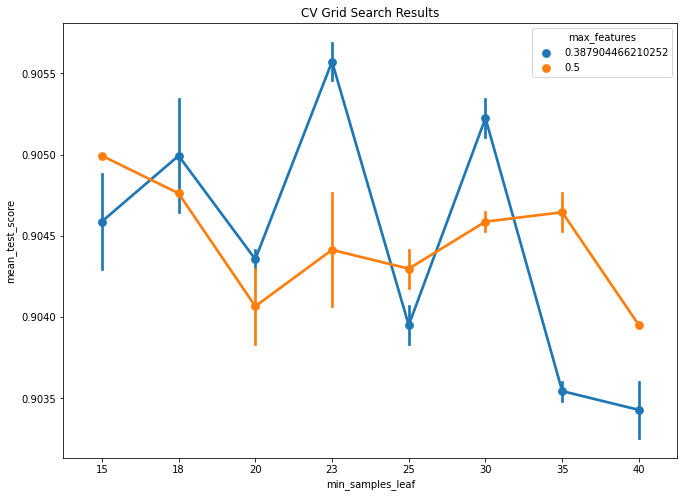

In [54]:
def plot_cv_results(cv_results_, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(grid_object.cv_results_)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_object, 'min_samples_leaf', 'max_features')

## Lecture graphique des scores en fonction de **'min_samples_leaf'** et de **'n_estimators'**

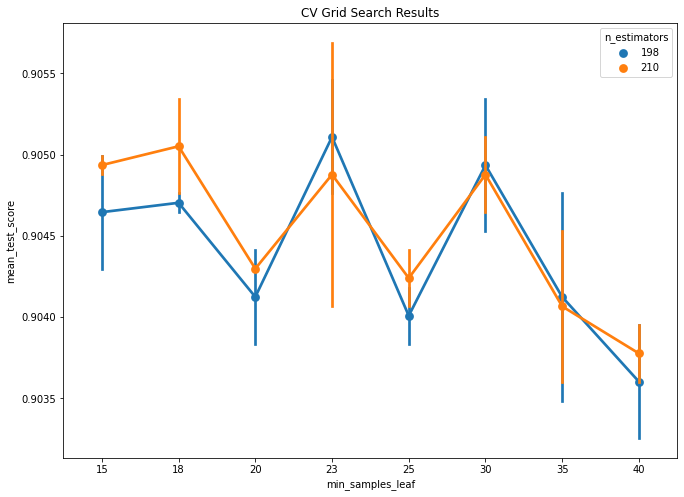

In [55]:
def plot_cv_results(cv_results_, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(grid_object.cv_results_)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_object, 'min_samples_leaf', 'n_estimators')

In [56]:
#Extraction des meilleures parametres
grid_object.best_params_

{'max_features': 0.387904466210252,
 'min_samples_leaf': 23,
 'n_estimators': 210}

In [57]:
# Ajustement du modèle avec ces paramètres

randomF_model = RandomForestClassifier(max_features= 0.387904466210252, min_samples_leaf=15, n_estimators=200, random_state = 4)

randomF_model.fit(X_train, y_train)
randomF_model.score(X_test, y_test)

0.901595025682617

**Avec les paramètres _'max_features': 0.387904466210252, 'min_samples_leaf': 15,
'n_estimators': 200,_ nous obtenons un score de de `0.9015` avec un algorithme RandomForest**

### **(5) Stochastic Gradient Boosting**

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoosting_model = GradientBoostingClassifier(n_estimators=88)
gradientBoosting_model.fit(X_train, y_train)
gradientBoosting_model.score(X_test, y_test)

0.9010543390105434

### Réglage des Hyperparamètres

- n_estimators
- min_samples_split
- min_samples_leaf 
- learning_rate
- max_features
- max_depth
- subsample

**ATTENTION!** 

**l'exécution de la cellule suivante prendra du temps, mais elle vous permettra d'exécuter des visualisation intéressante. Vous pouvez toutefois passer à la 6eme cellule plus loin pour l'ajustement du modèle avec les meilleurs paramètres que nous avons déjà extraits**

In [59]:
grid_params = {
    #"n_estimators":[88,95,100],
    "min_samples_split":[750,650],
    "min_samples_leaf":[398,410,420,450,460,470,480,500], 
    "learning_rate":[0.1,0.05],
    #"max_features":[50],
    #"max_depth":[8],
    "subsample":[0.7,0.8]
}

# Création d'un GridSearchCVobjet avec le classifieur de l’arbre de décision comme estimateur
grid_object = GridSearchCV(estimator = gradientBoosting_model, param_grid = grid_params, scoring = 'accuracy', cv = 10)
                           
# Nous ajustons ensuite cet objet de grille aux données d'apprentissage
grid_object.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=88,
                                                  n_iter_no_c...
                 

## Lecture graphique des scores en fonction de **'min_samples_leaf'** et de **'min_samples_split'**

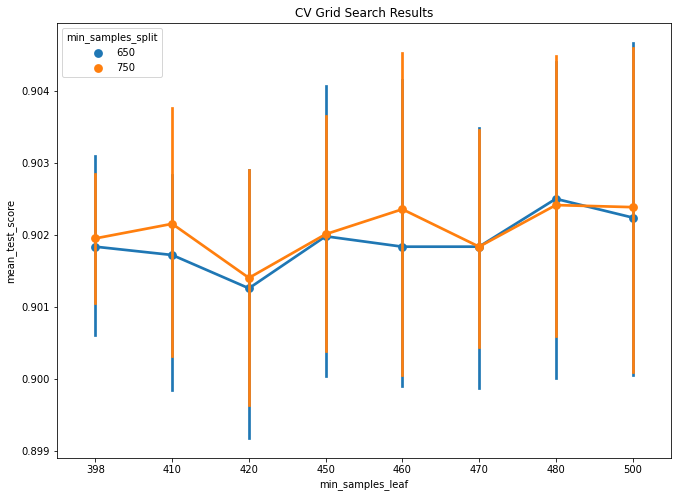

In [60]:
def plot_cv_results(cv_results_, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(grid_object.cv_results_)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_object, 'min_samples_leaf', 'min_samples_split')

## Lecture graphique des scores en fonction de **'min_samples_leaf'** et de **'learning_rate'**

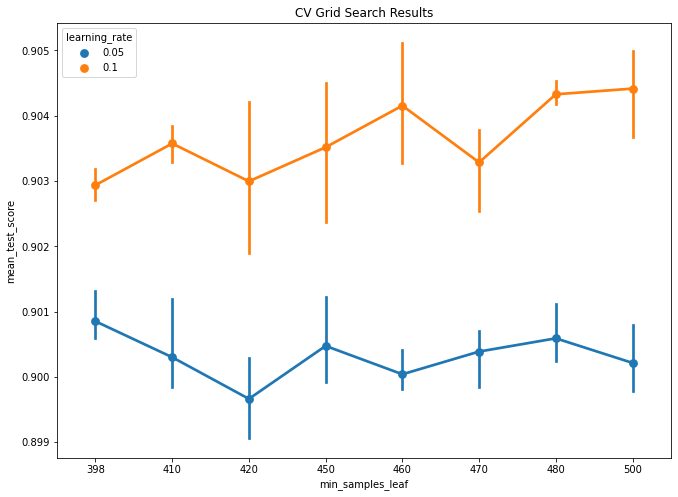

In [61]:
def plot_cv_results(cv_results_, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(grid_object.cv_results_)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_object, 'min_samples_leaf', 'learning_rate')

## Lecture graphique des scores en fonction de **'min_samples_leaf'** et de **'subsample'**

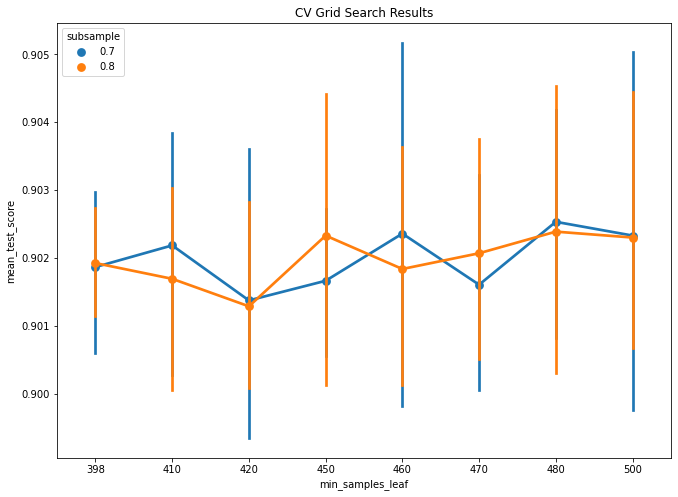

In [62]:
def plot_cv_results(cv_results_, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(grid_object.cv_results_)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_object, 'min_samples_leaf', 'subsample')

In [63]:
#Extraction des meilleures parametres
grid_object.best_params_

{'learning_rate': 0.1,
 'min_samples_leaf': 460,
 'min_samples_split': 750,
 'subsample': 0.7}

In [64]:
# Ajustement du modèle avec ces paramètres

gradientBoosting_model = GradientBoostingClassifier(n_estimators=88, min_samples_split=750,min_samples_leaf=398, 
                                                    learning_rate = 0.1, max_features=50, max_depth=8, subsample=0.7,
                                                    random_state = 50)
gradientBoosting_model.fit(X_train, y_train)
gradientBoosting_model.score(X_test, y_test)

0.9061908623952419

**Nous obtenons finalement un score de de 0.9061 avec un algorithme Stochastic Gradient Boosting**

# Autres modèles

### **Support Vector Machine (SVM)**

In [65]:
from sklearn.svm import LinearSVC

# Instanciation du modèle
svm_model = LinearSVC(random_state=50)

# Apprentissage et évaluation du modèle par cross-validation de 10 partitions
score = cross_val_score(svm_model, X, Y, cv = 10)
np.mean(score)

0.7879156528791567

### **Bagging Classifier**

In [66]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(n_estimators=88, random_state=50)

# Apprentissage et évaluation du modèle par cross-validation de 10 partitions
score = cross_val_score(bagging_model, X, Y, cv = 10)
np.mean(score)

0.8762368207623682

### **AdaBoost Classifier**

In [67]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost_model = AdaBoostClassifier(n_estimators=88, random_state=50)

# Apprentissage et évaluation du modèle par cross-validation de 10 partitions
score = cross_val_score(adaBoost_model, X, Y, cv = 10)
np.mean(score)

0.8683698296836984

### **ExtraTrees Classifier**

In [68]:
from sklearn.ensemble import ExtraTreesClassifier

extraTrees_model = ExtraTreesClassifier(n_estimators=88, random_state=50)

# Apprentissage et évaluation du modèle par cross-validation de 10 partitions
score = cross_val_score(extraTrees_model, X, Y, cv = 10)
np.mean(score)

0.8651257096512571

# **Choix du meilleur modèle**

In [69]:
modeles = {
    'KNN': 0.8691,
    'Logistic Reg.': 0.8758,
    'Arbre de dec.': 0.8933,
    'Random Forrest': 0.9015,
    'Stochastic Gr. Bosting': 0.9061,
    'SVM': 0.8764,
    'Bagging': 0.8762,
    'AdaBoost': 0.8683,
   'ExtraTrees': 0.8651
}
modeles = pd.DataFrame(list(modeles.items()), columns=['Modèle', 'Score'])
modeles

,Modèle,Score
0,KNN,0.8691
1,Logistic Reg.,0.8758
2,Arbre de dec.,0.8933
3,Random Forrest,0.9015
4,Stochastic Gr. Bosting,0.9061
5,SVM,0.8764
6,Bagging,0.8762
7,AdaBoost,0.8683
8,ExtraTrees,0.8651


### Lecture graphique de la qualité des modèles par ordre croissant de score

In [70]:
# bar chart

# data
x_bar = modeles['Modèle'].to_list()
y_bar = modeles['Score'].to_list()

# sort data (sort x by its cooresponding y)
sorted_categories = sorted(x_bar, key=lambda x: y_bar[x_bar.index(x)], reverse=True)

# plot
bar_chart = figure(y_range=sorted_categories, title='Bar Plot', x_axis_label='x', y_axis_label='y', plot_height=600)
bar_chart.hbar(y = x_bar, right=y_bar, color='aqua', width=0.5, height=0.5)
bar_chart.x_range.start = 0
show(bar_chart)

# use hbar for horizontal bar chart

Le meilleur modèle est celui du **Stochastic Gradient Boosting** avec un score de **0.9061**

## `Constuction d'un API Flask`

In [71]:
import pickle

# sauvegarde du modèle de remise à échéchelle minmaxscaler
pickle.dump(ms, open('minmaxscaler_model.pickel', 'wb'))

# sauvegarde du modèle de machine learning
pickle.dump(gradientBoosting_model, open('onlineShopper_model.pickel', 'wb'))